In [3]:
from montecarlo import MonteCarlo
from Models.CIRModel import BasicCIRModel
from Models.ECIR_new import ECIRModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the DGS_30 data
dgs_30_data = pd.read_csv('DGS_30.csv')

# Convert the 'DATE' column to datetime and set it as index for both DataFrames
dgs_30_data.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
dgs_30_data['Date'] = pd.to_datetime(dgs_30_data['Date'])
dgs_30_data.set_index('Date', inplace=True)

data=dgs_30_data

dates = data.loc[data.index >= '2024-03-19'].index
#years = [1, 2, 

params_ecir = {
    "kappa": 0.01227,    
    "mu_r": 0.09854,     
    "sigma": 0.09395,    
    "mu": 0.002995,      
    "gamma": 0.002321       
}

params_cir = {
    "kappa": 1.2310,
    "mu_r": 0.0459,
    "sigma": 0.1410
}

In [5]:
def create_model(mod, data):
    models = []
    for column in data.columns:
            if 'DGS' in column:                    
                maturity = (int(column.replace('DGS', '').replace('MO', '')) / 12) if 'MO' in column else int(column.replace('DGS', ''))
                models.append(MonteCarlo(mod, data[column][0]/100, maturity, 255*maturity, 100))
    return models

In [6]:
cir = create_model(BasicCIRModel(**params_cir), data)
ecir = create_model(ECIRModel(**params_ecir), data)

/var/folders/g5/t7j1zvnx6cl8hpbmv534dj4c0000gn/T/ipykernel_44811/2265433544.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  models.append(MonteCarlo(mod, data[column][0]/100, maturity, 255*maturity, 100))


In [7]:
prices_cir = pd.DataFrame()
for model in cir:
    prices_cir[model] = model.price_estimates()[2]

prices_cir.columns = data.columns

In [8]:
prices_ecir = pd.DataFrame()
for model in ecir:
    prices_ecir[model] = model.price_estimates()[2]

prices_ecir.columns = data.columns

In [9]:
avg_cir = []
err_cir = []
for col in prices_cir:
    avg_cir.append(np.mean(prices_cir[col]))
    err_cir.append(np.std(prices_cir[col]))

avg_ecir = []
err_ecir = []
for col in prices_ecir:
    avg_ecir.append(np.mean(prices_ecir[col]))
    err_ecir.append(np.std(prices_ecir[col]))

In [10]:
err_cir
err_ecir


[0.06250859830911883,
 0.23772390366431612,
 0.2372952752949578,
 0.3182032804312535,
 0.2252762168690352,
 0.3331810073476847,
 0.22920516424827644,
 0.2853391870331676,
 0.25655798435064675,
 0.3104485444332315,
 0.3096833727560954,
 0.25894285949901436,
 0.32173174863432086,
 0.3383936802125455,
 0.2720569559275702,
 0.3100546940635595,
 0.2675998978926589,
 0.22071132069494956,
 0.2872139699289247,
 0.2765223986896151,
 0.27307312421379265,
 0.26582284476944845,
 0.16173364001231819,
 0.2598629792910588,
 0.2723484692994182,
 0.19522188075507507,
 0.18445946428667115,
 0.21152280712671576,
 0.2041910402051788,
 0.20986501853888714]

Text(0, 0.5, 'Price')

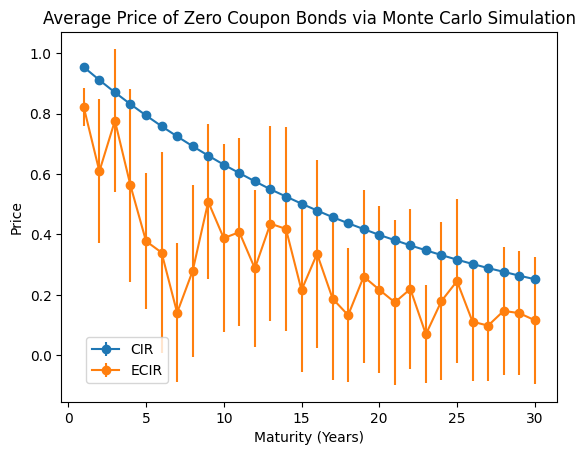

In [11]:
plt.errorbar(np.arange(1, 31), avg_cir, yerr = err_cir, label = 'CIR', marker = 'o')
plt.errorbar(np.arange(1, 31), avg_ecir, yerr = err_ecir, label = 'ECIR', marker = 'o')
plt.legend(loc = (0.05, 0.05))
plt.title('Average Price of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Price')

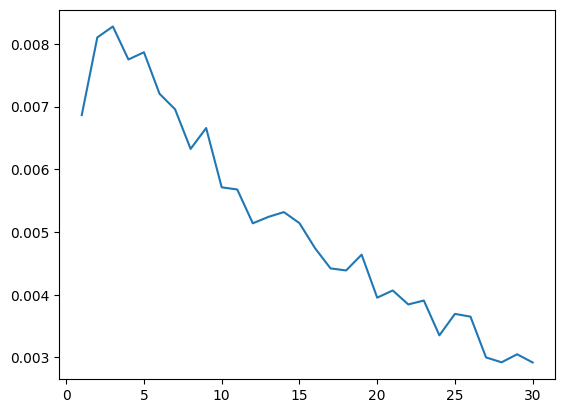

In [12]:
plt.plot(np.arange(1, 31), err_cir)
#plt.plot(np.arange(1, 31), err_ecir)

In [13]:
cir_paths = pd.DataFrame()

for i in range(len(cir)):
    paths = cir[i].paths()
    for j in range(len(paths)):
        paths[j] = np.mean(paths[j])
    cir_paths[data.columns[i]] = paths

In [14]:
ecir_paths = pd.DataFrame()

for i in range(len(ecir)):
    paths = ecir[i].paths()
    for j in range(len(paths)):
        paths[j] = np.mean(paths[j])
    ecir_paths[data.columns[i]] = paths

In [15]:
avg_cir_rate = []
err_cir_rate = []
for col in cir_paths:
    avg_cir_rate.append(np.mean(cir_paths[col]))
    err_cir_rate.append(np.std(cir_paths[col]))

avg_ecir_rate = []
err_ecir_rate = []
for col in ecir_paths:
    avg_ecir_rate.append(np.mean(ecir_paths[col]))
    err_ecir_rate.append(np.std(ecir_paths[col]))

Text(0, 0.5, 'Yield Rate')

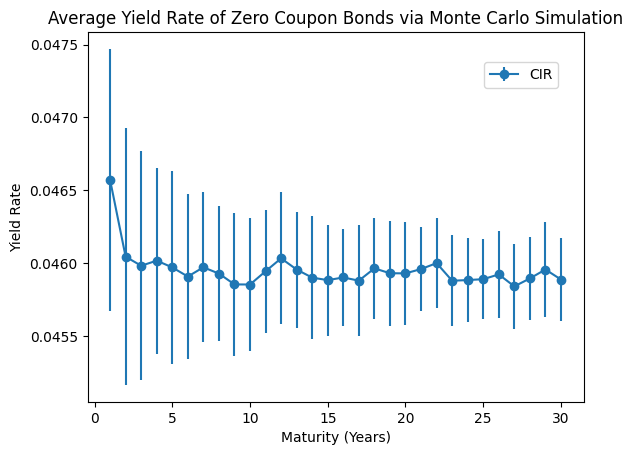

In [16]:
plt.errorbar(np.arange(1, 31), avg_cir_rate, yerr = err_cir_rate, label = 'CIR', marker = 'o')
#plt.errorbar(np.arange(1, 31), avg_ecir_rate, yerr = err_ecir_rate, label = 'ECIR', marker = 'o')
plt.legend(loc = (0.8, 0.85))
plt.title('Average Yield Rate of Zero Coupon Bonds via Monte Carlo Simulation')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield Rate')

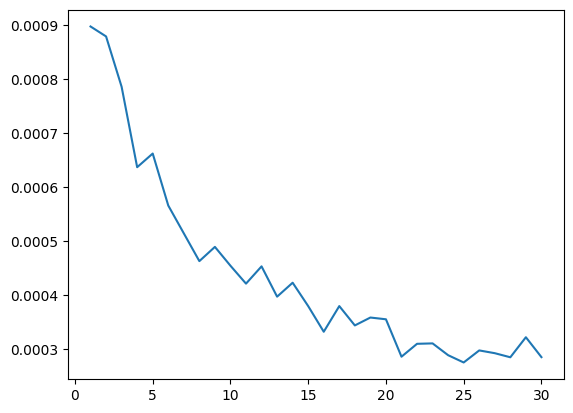

In [17]:
plt.plot(np.arange(1, 31), err_cir_rate)
#plt.plot(np.arange(1, 31), err_ecir_rate)

Standard Deviation- Yield Rates Estimates

In [18]:
import pandas as pd

# Create DGS labels for the length of err_cir list
dgs_labels = [f'DGS{i+1}' for i in range(len(err_cir))]

# Create a DataFrame from err_cir with dgs_labels as the index
sd_cir_rate_df = pd.DataFrame(err_cir_rate, columns=['sd'], index=dgs_labels)
sd_ecir_rate_df=pd.DataFrame(err_ecir_rate, columns=['sd'], index=dgs_labels)
sd_rate_df = sd_cir_rate_df.join(sd_ecir_rate_df, lsuffix='_CIR', rsuffix='_ECIR')
#sd_df=sd_cir_df[['Standard Deviation']].join(sd_ecir_df[['Standard Deviation']])
sd_rate_df


,sd_CIR,sd_ECIR
DGS1,0.000898,0.147668
DGS2,0.000880,0.187291
DGS3,0.000786,0.372337
DGS4,0.000637,0.459606
DGS5,0.000663,0.290388
DGS6,0.000566,0.575470
DGS7,0.000515,0.175888
DGS8,0.000463,0.313957
DGS9,0.000490,0.098724
DGS10,0.000455,0.145358


Standard Deviation——Bond Price Estimates


In [31]:
import pandas as pd

# Create DGS labels for the length of err_cir list
dgs_labels = [f'DGS{i+1}' for i in range(len(err_cir))]

# Create a DataFrame from err_cir with dgs_labels as the index
sd_cir_df = pd.DataFrame(err_cir, columns=['Standard Deviation'], index=dgs_labels)
sd_ecir_df=pd.DataFrame(err_ecir, columns=['Standard Deviation'], index=dgs_labels)
sd_df = sd_cir_df.join(sd_ecir_df, lsuffix='_CIR', rsuffix='_ECIR')
#sd_df=sd_cir_df[['Standard Deviation']].join(sd_ecir_df[['Standard Deviation']])
sd_df


,Standard Deviation_CIR,Standard Deviation_ECIR
DGS1,0.006866,0.062509
DGS2,0.008105,0.237724
DGS3,0.008279,0.237295
DGS4,0.007753,0.318203
DGS5,0.007868,0.225276
DGS6,0.007206,0.333181
DGS7,0.006959,0.229205
DGS8,0.006326,0.285339
DGS9,0.006659,0.256558
DGS10,0.005713,0.310449


Mean Absolute Error-Yield Rates

In [20]:
df = pd.read_csv('DGS_30.csv')

# Extract the relevant columns for the specified maturities
maturities = ['DGS1', 'DGS2', 'DGS3', 'DGS4', 'DGS5', 'DGS6', 'DGS7', 'DGS8', 'DGS9', 'DGS10',
              'DGS11', 'DGS12', 'DGS13', 'DGS14', 'DGS15', 'DGS16', 'DGS17', 'DGS18', 'DGS19', 'DGS20',
              'DGS21', 'DGS22', 'DGS23', 'DGS24', 'DGS25', 'DGS26', 'DGS27', 'DGS28', 'DGS29', 'DGS30']

actual_rates_selected = df[maturities]

# Calculate the average rate for each maturity to use as actual rates
actual_rates_mean = 0.1*actual_rates_selected.mean()
estimated_rates_cir=avg_cir_rate
estimated_rates_ecir=avg_ecir_rate

# Calculate the MAE for each term
mae_rates_cir = abs(actual_rates_mean - estimated_rates_cir)
mae_rates_ecir = abs(actual_rates_mean - estimated_rates_ecir)

# Create a DataFrame to display the MAE for each term for CIR and ECIR models
mae_rates_df = pd.DataFrame({'CIR': mae_rates_cir, 'ECIR': mae_rates_ecir})

# Transpose the DataFrame so that models are in rows and terms are in columns
mae_rates_df = mae_rates_df.T

# Ensure the column names match the original maturities list for display
mae_rates_df.columns =['DGS1', 'DGS2', 'DGS3', 'DGS4', 'DGS5', 'DGS6', 'DGS7', 'DGS8', 'DGS9', 'DGS10',
              'DGS11', 'DGS12', 'DGS13', 'DGS14', 'DGS15', 'DGS16', 'DGS17', 'DGS18', 'DGS19', 'DGS20',
              'DGS21', 'DGS22', 'DGS23', 'DGS24', 'DGS25', 'DGS26', 'DGS27', 'DGS28', 'DGS29', 'DGS30']

# Display the DataFrame
mae_rates_df


,DGS1,DGS2,DGS3,DGS4,DGS5,DGS6,DGS7,DGS8,DGS9,DGS10,...,DGS21,DGS22,DGS23,DGS24,DGS25,DGS26,DGS27,DGS28,DGS29,DGS30
CIR,0.367062,0.398764,0.417928,0.434800,0.450976,0.465621,0.477534,0.486180,0.492165,0.496429,...,0.516094,0.517250,0.518752,0.520377,0.522316,0.524609,0.527462,0.530690,0.534487,0.539058
ECIR,0.195432,0.146513,0.045860,0.116615,0.014561,0.002007,0.294744,0.132102,0.413021,0.425625,...,0.298745,0.343168,0.218263,0.188305,0.225550,0.122073,0.264409,0.418642,0.383760,0.282813


In [26]:
print(mae_rates_df.values)

[[0.36706235 0.39876352 0.41792804 0.4347999  0.45097561 0.4656208
  0.47753403 0.48617962 0.49216462 0.49642914 0.49983671 0.50270957
  0.50527676 0.50741723 0.50917863 0.51063033 0.51191275 0.51294549
  0.51401744 0.5150445  0.51609367 0.51725005 0.51875177 0.52037727
  0.52231625 0.52460866 0.52746192 0.53068968 0.53448748 0.53905763]
 [0.19543156 0.14651258 0.04586049 0.11661509 0.014561   0.00200672
  0.29474407 0.13210176 0.41302145 0.42562492 0.2258992  0.26764256
  0.33094866 0.33367698 0.34913932 0.38036461 0.32346311 0.36883338
  0.41235636 0.25921915 0.29874499 0.34316787 0.21826265 0.18830496
  0.22555019 0.12207286 0.26440937 0.41864239 0.38375992 0.28281272]]


In [22]:


# Calculate the mean of each MAE and create a DataFrame
mae_bond_prices_df = pd.DataFrame({
    'CIR': [mae_rates_cir.mean()], 
    'ECIR': [mae_rates_cir.mean()]
})

# Optionally, you can assign an index name if needed
mae_bond_prices_df.index = ['MAE']

# Display the DataFrame
print(mae_bond_prices_df)

          CIR      ECIR
MAE  0.494251  0.494251


Mean Absolute Error-Bond Price

In [28]:
import pandas as pd
import numpy as np

# Load data from a CSV file
df = pd.read_csv('DGS_30.csv')

# Select the relevant columns
maturities = ['DGS1', 'DGS2', 'DGS3', 'DGS4', 'DGS5', 'DGS6', 'DGS7', 'DGS8', 'DGS9', 'DGS10',
              'DGS11', 'DGS12', 'DGS13', 'DGS14', 'DGS15', 'DGS16', 'DGS17', 'DGS18', 'DGS19', 'DGS20',
              'DGS21', 'DGS22', 'DGS23', 'DGS24', 'DGS25', 'DGS26', 'DGS27', 'DGS28', 'DGS29', 'DGS30']
actual_rates_selected = df[maturities]

# Calculate the average interest rate for each maturity
actual_rates_mean = 0.1 * actual_rates_selected.mean()

# Assume a face value for the bonds
face_value = 1
# Define actual years to maturity
years_to_maturity = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

# Calculate bond prices using actual interest rates
actual_bond_prices = face_value / ((1 + actual_rates_mean/100 ) ** years_to_maturity)



# Calculate Mean Absolute Error (MAE)
mae_bond_prices_cir = abs(actual_bond_prices - avg_cir )
mae_bond_prices_ecir = abs(actual_bond_prices - avg_ecir )

# Create a DataFrame to display the MAE of each model
mae_bond_prices_df = pd.DataFrame({'CIR': mae_bond_prices_cir, 'ECIR': mae_bond_prices_ecir}, index=maturities)

# Transpose the DataFrame so models are in rows and terms are in columns
mae_bond_prices_df = mae_bond_prices_df.T

# Display the DataFrame
print(mae_bond_prices_df)

          DGS1      DGS2      DGS3      DGS4      DGS5      DGS6      DGS7  \
CIR   0.042425  0.080503  0.116441  0.150099  0.181827  0.211757  0.239837   
ECIR  0.175377  0.382382  0.209878  0.418973  0.597604  0.629615  0.822914   

          DGS8      DGS9     DGS10  ...     DGS21     DGS22     DGS23  \
CIR   0.266524  0.292051  0.316457  ...  0.507765  0.519918  0.530886   
ECIR  0.678954  0.444812  0.559560  ...  0.713466  0.664073  0.808779   

         DGS24     DGS25     DGS26     DGS27     DGS28     DGS29     DGS30  
CIR   0.541437  0.551255  0.560019  0.568134  0.574787  0.581680  0.587433  
ECIR  0.693446  0.622236  0.751000  0.758379  0.704126  0.705609  0.723029  

[2 rows x 30 columns]


In [29]:
print(mae_bond_prices_df.values)

[[0.04242456 0.08050312 0.11644096 0.15009871 0.18182712 0.21175713
  0.23983746 0.26652438 0.29205148 0.31645734 0.33885233 0.36065456
  0.38162598 0.40017545 0.41839711 0.43576802 0.45247643 0.467428
  0.48157387 0.49561587 0.50776502 0.51991763 0.5308861  0.54143713
  0.5512553  0.56001933 0.56813412 0.57478697 0.58167993 0.58743259]
 [0.17537703 0.38238206 0.20987844 0.41897275 0.59760391 0.62961545
  0.82291363 0.67895355 0.44481168 0.55955976 0.53410472 0.64880639
  0.49535705 0.50729761 0.70472834 0.57894636 0.72200257 0.7715523
  0.63862159 0.67676844 0.71346604 0.66407269 0.80877945 0.69344587
  0.62223559 0.75099958 0.75837855 0.70412629 0.705609   0.72302884]]


In [24]:
# Calculate Mean Absolute Error (MAE)
mae_bond_prices_cir = abs(actual_bond_prices - avg_cir)
mae_bond_prices_ecir = abs(actual_bond_prices - avg_ecir)

# Calculate the mean of each MAE and create a DataFrame
mae_bond_prices_df = pd.DataFrame({
    'CIR': [mae_bond_prices_cir.mean()], 
    'ECIR': [mae_bond_prices_ecir.mean()]
})

# Optionally, you can assign an index name if needed
mae_bond_prices_df.index = ['MAE']

# Display the DataFrame
print(mae_bond_prices_df)


         CIR      ECIR
MAE  0.38846  0.611413
